In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [27]:
import imagewizard as iw
import cv2
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def display_image(image, title="Title"):
    if not isinstance(image, np.ndarray):
        data = np.asarray(image)
    else:
        data = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.title(title)
    ax = plt.subplot(1, 1, 1)
    plt.imshow(data)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    return plt.show()

In [113]:
def display_single_subplot(img, n_row, n_col, cell_num, title, sim_score = None):
    if not isinstance(img, np.ndarray):
        img = np.asarray(img)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
    ax = plt.subplot(n_row, n_col, cell_num)
    
    if sim_score is not None:
        plt.title(str(title) + "\nDistance : " + str(sim_score))
    else:
        plt.title(str(title))
        
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Image Hashing and Similarity Measurement

### Reading image

C:\Users\swaroop.padala\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


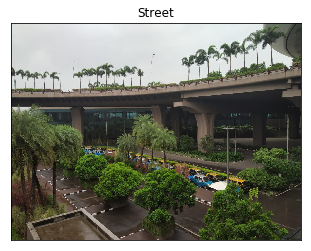

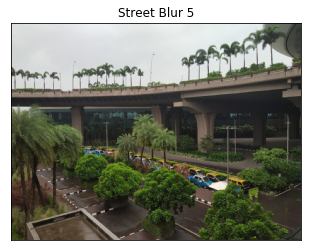

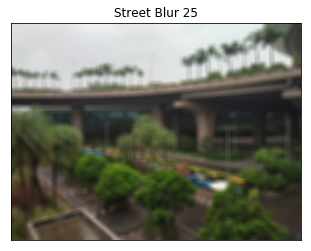

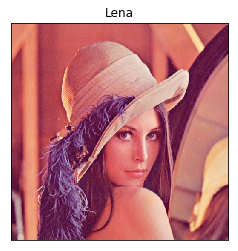

In [109]:
street = Image.open("data/street.png")

# cv2.imread gives a numpy array as an output
lena = cv2.imread("data/lenna.png")

street_blur_5 = Image.open("data/street_blur_5.png")
street_blur_25 = Image.open("data/street_blur_25.png")

display_image(street, "Street")
display_image(street_blur_5, "Street Blur 5")
display_image(street_blur_25, "Street Blur 25")
display_image(lena, "Lena")

### Hashing image example

In [126]:
hashing = iw.Hashing()

# creating the hash
src_hash = str(hashing.dhash(street))
val_hash1 = str(hashing.dhash(street_blur))
val_hash2 = str(hashing.dhash(lena))

print("Street Hash: {}".format(src_hash))
print("Street Blur Hash: {}".format(val_hash1))
print("Lena Hash: {}".format(val_hash2))

Street Hash: 48b09035b16c9ccb
Street Blur Hash: 48b09035b16c9ccb
Lena Hash: 7670795b33135a3c


### Hash distance (similarity) example

In [128]:
sim = iw.Similarity()

dist1 = sim.similarity(src_hash, val_hash1, metric='hamming')
print("hamming distance (src_hash & val_hash1): {}".format(dist1))

dist2 = sim.similarity(src_hash, val_hash2, metric='hamming')
print("hamming distance (src_hash & val_hash2): {}".format(dist2))

hamming distance (src_hash & val_hash1): 0
hamming distance (src_hash & val_hash2): 37


### Hashing the source image

In [118]:
sim = iw.Similarity()

In [119]:
src_img = {
    'image': street, 
    'title': 'Street'
}
src_img['hash'] = hashing.dhash(src_img['image'])
src_hash_str = str(src_img['hash'])

In [120]:
src_hash_str

'48b09035b16c9ccb'

### Hashing the query images and finding similarity distance

In [129]:
query_img = [
    {'image': street_blur_5, 'title': 'Street Blur 5'},
    {'image': street_blur_25, 'title': 'Street Blur 25'},
    {'image': lena, 'title': 'Lena'}
]

# hashing query images and fidning similarity
for i in query_img:
    i['hash'] = hashing.dhash(i['image'])
    hash_str = str(i['hash'])
    i['sim_score'] = sim.similarity(value_src = src_hash_str, value_query = hash_str, metric='hamming')

### Display source image and query images with similarity scores

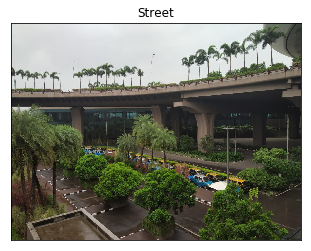

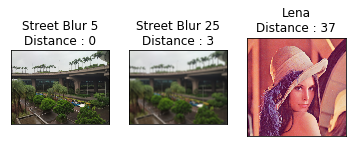

In [130]:
# display original source image
display_single_subplot(src_img['image'], 1, 1, 1, src_img['title'])
plt.show()

# display query images with similariy score
n = len(query_img)
for idx, i in enumerate(query_img):
    display_single_subplot(i['image'], 1, n, idx+1, i['title'], i['sim_score'])
plt.show()